In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [95]:
# read the file
columns_name = [
    "Class",
    "age",
    "menopause",
    "tumor-size",
    "inv-nodes",
    "node-caps",
    "deg-malig",
    "breast",
    "breast-quad",
    "irradiat",
]
df = pd.read_csv("breast-cancer.data", names=columns_name)
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [96]:
for i in df.columns:
    print(df[i].unique())
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df_new = df[
    [
        "Class",
        "age",
        "menopause",
        "tumor-size",
        "inv-nodes",
        "node-caps",
        "deg-malig",
        "irradiat",
    ]
]
df_new

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
[3 2 1]
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,no
...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,no


In [97]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

menopause = [["premeno", "ge40", "lt40"]]
enc = preprocessing.OneHotEncoder(categories=menopause)
# feature
X = df_new["menopause"].values.reshape(-1, 1)
enc.fit(X)
feature1 = enc.transform(X).toarray()

In [101]:
Class = ["no-recurrence-events", "recurrence-events"]
tumor_size = [
    "0-4",
    "5-9",
    "10-14",
    "15-19",
    "20-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
]
inv_nodes = ["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "18-20", "21-23", "24-26"]
node_caps = ["no", "yes"]
irradiat = ["no", "yes"]
age = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
# tumor-size
enc = preprocessing.OrdinalEncoder(
    categories=[Class, age, tumor_size, inv_nodes, node_caps, irradiat]
)
other_columns = df_new[
    ["Class", "age", "tumor-size", "inv-nodes", "node-caps", "irradiat"]
]
X1 = other_columns.values
enc.fit(X1)
feature2 = enc.transform(X1)
feature3 = df_new[["deg-malig"]].values
feature = np.concatenate([feature1, feature2, feature3], axis=1)

[]

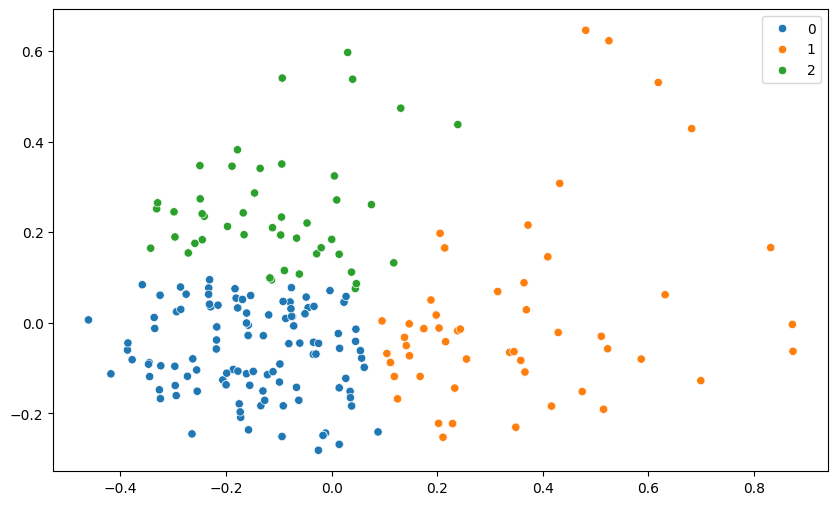

In [102]:
# Normalizing the training and testing data
feature_norm = preprocessing.normalize(feature)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(feature_norm)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette="tab10")
plt.plot()

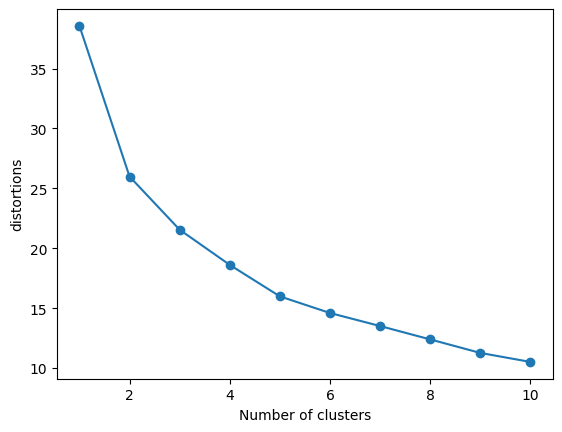

In [106]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    )
    km.fit(feature_norm)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("distortions")
plt.show()

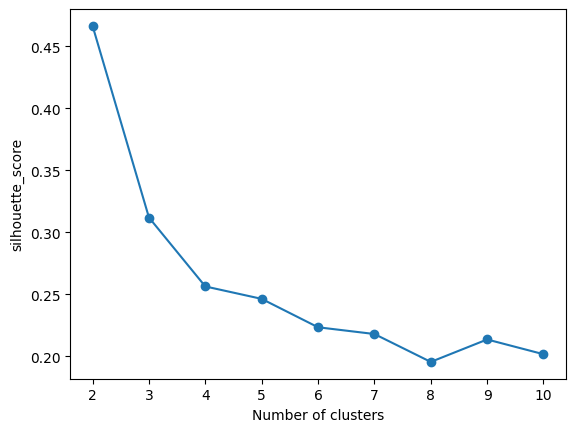

In [107]:
from sklearn.metrics import silhouette_score

distortions = []
for i in range(2, 11):
    km = KMeans(
        n_clusters=i, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    )
    km.fit(feature_norm)
    distortions.append(silhouette_score(X_pca, km.labels_, metric="euclidean"))

# plot
plt.plot(range(2, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()
'''
clusters = 8 has the lowest silhouette_score
8 is the best number of clusters
'''

'\nGroup similar patients into 8 categories based on Class, age, menopause, tumor size, inv-nodes, node-caps, deg-malig, and irradiation\n'

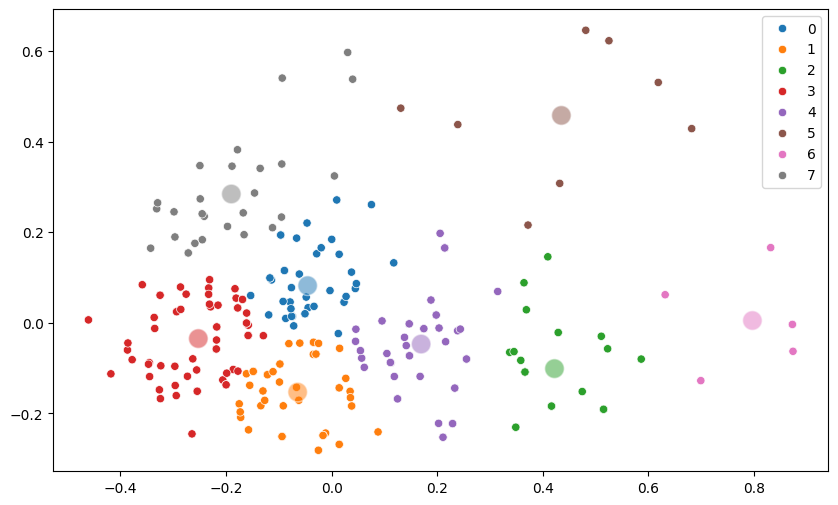

In [136]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init=10)
kmeans.fit(X_pca)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette="tab10")
centers = kmeans.cluster_centers_
sns.scatterplot(
    x=centers[:, 0],
    y=centers[:, 1],
    hue=np.arange(8),
    palette="tab10",
    s=200,
    legend=False,
    alpha=0.5,
)
plt.plot()
'''
Group similar patients into 8 categories based on Class, age, menopause, tumor size, inv-nodes, node-caps, deg-malig, and irradiation
'''